imports

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.integrate import quad


## Константы и параметры

In [69]:
# Константы
mE = 9.10938356e-31  # кг (масса электрона)
eV = 1.60218e-19  # Дж (1 эВ в Джоулях)
hbar = 1.0545718e-34  # Дж*с (приведенная постоянная Планка)

# Параметры задание 1
a = 1e-9  # Половина ширины ямы м
u = 3 * eV  # Глубина ямы эВ
N = 1000  # Число точек для разбиения [-2a, 2a]
L = 3 * a  # Общая длина области


# Задание 1

Используя уравнение Шредингера, найти связные состояния и соответствующие им
собственные значения в случае прямоугольной потенциальной ямы.

Построить графически собственные функции.

## Расчёты
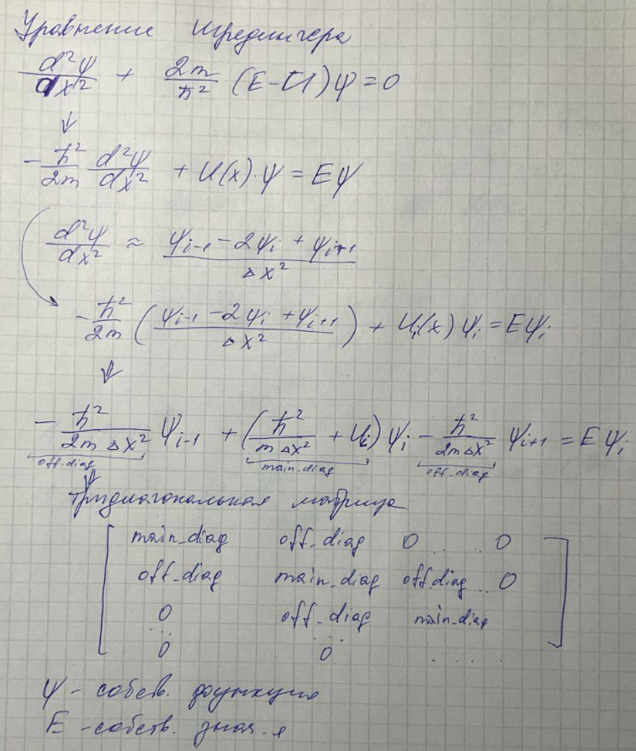

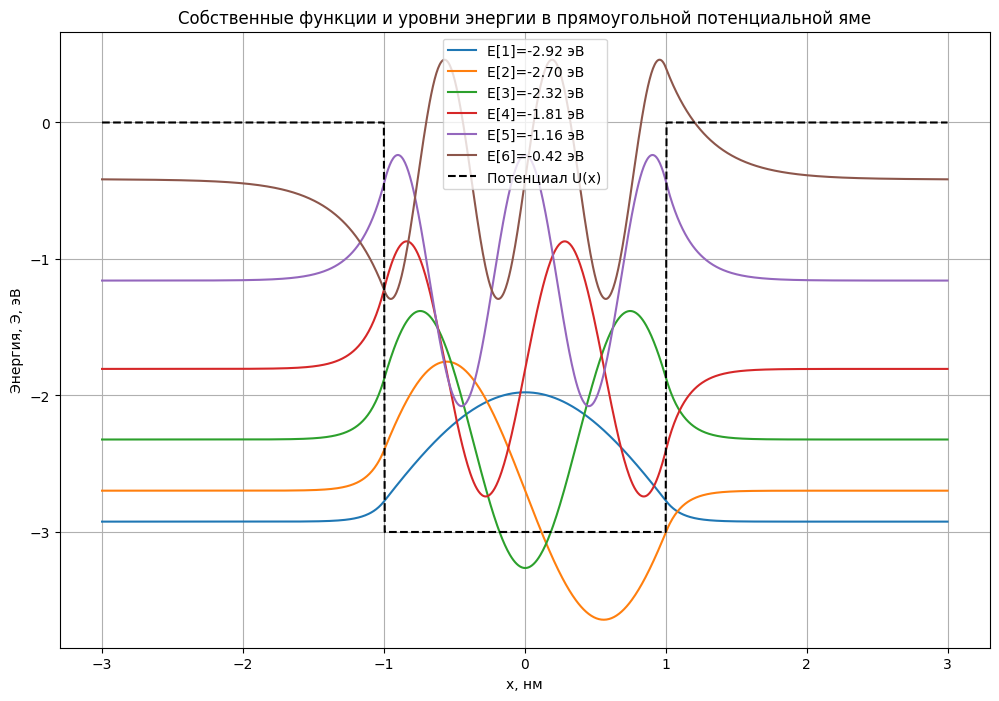

In [70]:

x = np.linspace(-L, L, N)
dx = x[1] - x[0]

U = np.zeros_like(x)
U[np.abs(x) < a] = -u
U[np.abs(x) >= a] = 0

main_diag = (hbar**2 / (mE * dx**2)) + U
off_diag = -(hbar**2) / (2 * mE * dx**2) * np.ones(N - 1)

E, psi = eigh_tridiagonal(main_diag, off_diag)

bound_indices = np.where(E < 0)[0]

normalized_wave_functions = psi[:, bound_indices] / np.sqrt(
    np.trapz(psi[:, bound_indices] ** 2, x * 1e9, axis=0)
)
# print(normalized_wave_functions[:10])

plt.figure(figsize=(12, 8))

for n, idx in enumerate(bound_indices):
    plt.plot(
        x * 1e9,
        normalized_wave_functions[:, n] + E[idx] / eV,
        label=f"E[{idx+1}]={E[idx]/eV:.2f} эВ",
    )

plt.plot(x * 1e9, U / eV, "k--", label="Потенциал U(x)")

plt.title("Собственные функции и уровни энергии в прямоугольной потенциальной яме")
plt.xlabel("x, нм")
plt.ylabel("Энергия, Э, эВ")
plt.legend()
plt.grid()
plt.show()


# Задание 2
Для потенциального барьера произвольной формы, задаваемого аналитической или
таблично заданной функцией U(x) > 0 в диапазоне от 0 до h, определить вероятность
прохождения такого барьера частицей с произвольной энергией E и массой mE.

## параметры задание 2

In [71]:
# параметры задание 2
m = 9.11e-31  # Масса частицы (кг)
E = 1.9e-20  # Энергия частицы (Дж)
U0 = 2e-20  # Высота барьера (Дж)
sigma = 1e-10  # Ширина барьера (м)


In [72]:


def vkb_transmission_probability(Ux, E, m, hbar):
    x, U = Ux

    barrier_region = U > E

    if np.all(~barrier_region):
        print("Потенциал меньше энергии частицы по всему барьеру. Вероятность = 1.")
        return 1.0

    def integrand(x_value):
        index = np.searchsorted(x, x_value)
        if index == len(x):
            index -= 1
        U_value = U[index]
        return np.sqrt(2 * m * (U_value - E)) / hbar

    region_min = x[barrier_region].min()
    region_max = x[barrier_region].max()

    middle = (region_max + region_min) / 2
    integral_value_1, _ = quad(integrand, region_min, middle, limit=1000)
    integral_value_2, _ = quad(integrand, middle, region_max, limit=1000)

    integral_value = integral_value_1 + integral_value_2

    T = np.exp(-2 * integral_value)
    return T

## Посторение граффика

Вероятность прохождения методом ВКБ: 0.971760


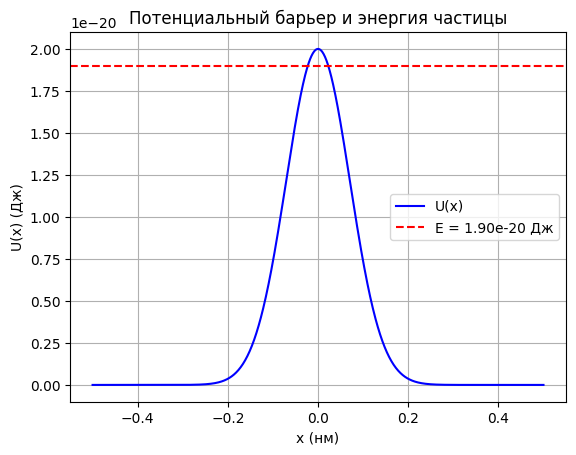

In [73]:

# Потенциальный барьер: U(x) = U0 * exp(-x^2 / sigma^2)
x = np.linspace(-5e-10, 5e-10, 1000)
U = U0 * np.exp(-x ** 2 / sigma ** 2)

T = vkb_transmission_probability((x, U), E, m, hbar)
print(f"Вероятность прохождения методом ВКБ: {T:.6f}")

plt.plot(x * 1e9, U, label="U(x)", color="blue")
plt.axhline(E, color="red", linestyle="--", label=f"E = {E:.2e} Дж")
plt.title("Потенциальный барьер и энергия частицы")
plt.xlabel("x (нм)")
plt.ylabel("U(x) (Дж)")
plt.legend()
plt.grid(True)
plt.show()

